- http://www.fec.gov/finance/disclosure/ftpdet.shtml#a2015_2016
- ftp://ftp.fec.gov/FEC/2016/indiv16.zip
- http://www.fec.gov/finance/disclosure/metadata/DataDictionaryContributionsbyIndividuals.shtml

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')

pd.options.display.max_rows = 10
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)

In [26]:
!mv /Users/tom.augspurger/Downloads/cm16.zip .
!mv /Users/tom.augspurger/Downloads/cn16.zip .

!unzip cm16.zip
!unzip cn16.zip 

Archive:  cm16.zip
  inflating: cm.txt                  
Archive:  cn16.zip
  inflating: cn.txt                  


In [340]:
!curl -O "ftp://ftp.fec.gov/FEC/2016/pas216.zip"
!unzip pas216.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  910k  100  910k    0     0   582k      0  0:00:01  0:00:01 --:--:--  582k
Archive:  pas216.zip
  inflating: itpas2.txt              


In [341]:
!curl -o cm_names.csv "http://www.fec.gov/finance/disclosure/metadata/cm_header_file.csv"
!curl -o cn_names.csv "http://www.fec.gov/finance/disclosure/metadata/cn_header_file.csv"
!curl -o in_names.csv "http://www.fec.gov/finance/disclosure/metadata/indiv_header_file.csv"
!curl -o cc_names.csv "http://www.fec.gov/finance/disclosure/metadata/pas2_header_file.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   158  100   158    0     0    962      0 --:--:-- --:--:-- --:--:--   963
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   180  100   180    0     0   1834      0 --:--:-- --:--:-- --:--:--  1836
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   204  100   204    0     0   1980      0 --:--:-- --:--:-- --:--:--  2000
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   212  100   212    0     0   2153      0 --:--:-- --:--:-- --:--:--  2163


In [37]:
in_names = pd.read_csv("in_names.csv").columns
cm_names = pd.read_csv("cm_names.csv").columns
cn_names = pd.read_csv("cn_names.csv").columns
cc_names = pd.read_csv("cc_names.csv").columns

# I/O

Pandas makes it easy to read from and write to a variety of formats.

In [38]:
[x for x in dir(pd) if x.startswith('read_')]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_pickle',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

`read_csv` has a ton of options...

In [4]:
pd.read_csv?

In [39]:
df = pd.read_csv('itcont.txt', sep='|', names=in_names, dtype={'ZIP_CODE': str})
cm = pd.read_csv('cm.txt', sep='|', names=cm_names)
cn = pd.read_csv('cn.txt', sep='|', names=cn_names)
cc = pd.read_csv("itpas2.txt", sep="|", names=cc_names)

Quick look at what we have...

In [40]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205519 entries, 0 to 205518
Data columns (total 21 columns):
CMTE_ID            205519 non-null object
AMNDT_IND          205519 non-null object
RPT_TP             205519 non-null object
TRANSACTION_PGI    205444 non-null object
IMAGE_NUM          205519 non-null int64
TRANSACTION_TP     205519 non-null object
ENTITY_TP          205365 non-null object
NAME               205510 non-null object
CITY               205373 non-null object
STATE              205151 non-null object
ZIP_CODE           204899 non-null object
EMPLOYER           165614 non-null object
OCCUPATION         171342 non-null object
TRANSACTION_DT     205518 non-null float64
TRANSACTION_AMT    205519 non-null int64
OTHER_ID           29908 non-null object
TRAN_ID            205507 non-null object
FILE_NUM           205519 non-null int64
MEMO_CD            5471 non-null object
MEMO_TEXT          48980 non-null object
SUB_ID             205519 non-null int64
dtypes: float6

Things to notice:

- tablular (like Excel)
- columnar (like Redshift)
- multiple dtypes (unlike NumPy)
- missing data handling (better than redshift)
- row-labels (unlike SQL)
- *Tons* of useful method (`df.<TAB>`)

We'll look a just a few of the methods, including aggregations, group-by, and merge.

# Counting

In [47]:
with pd.option_context('display.max_rows', 30):
    print(df.OCCUPATION.value_counts().head(30))

RETIRED                   23416
ATTORNEY                  10620
PRESIDENT                  6610
PARTNER                    5883
PHYSICIAN                  4683
NOT EMPLOYED               4100
HOMEMAKER                  3775
EXECUTIVE                  3191
CEO                        3190
CONSULTANT                 2668
OWNER                      2633
REAL ESTATE BROKER         2565
FARMER                     2368
PARTNER/PRINCIPAL          1984
DIRECTOR                   1750
VICE PRESIDENT             1697
PRINCIPAL                  1322
CHAIRMAN                   1185
PROFESSOR                  1069
LAWYER                     1038
MANAGER                     997
MANAGING DIRECTOR           987
INVESTOR                    949
REAL ESTATE                 937
BINGO PLAYER                937
PRESIDENT & CEO             807
NONE                        802
EXECUTIVE DIRECTOR          787
CPA                         695
DIAGNOSTIC RADIOLOGIST      675
dtype: int64


In [49]:
df.CMTE_ID.nunique()

2061

# Selecting

Give me the donations from Iowa.

In [82]:
df[df.STATE == 'IA'].head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
194,C00076182,N,Q1,P,15951125078,15,IND,"HERMANSON, NICK",STORY CITY,IA,...,WOODLAND FARMS,VP,3242015,300,NaN,AE741E5B4102D4A17A7A,1002289,NaN,NaN,4041320151241796898
195,C00076182,N,Q1,P,15951125078,15,IND,"HERMANSON, PETE",STORY CITY,IA,...,WEST LIBERTY FOODS,BOARD MEMBER,3242015,500,NaN,A75434D2CA00247BD99C,1002289,NaN,NaN,4041320151241796899
196,C00076182,N,Q1,P,15951125078,15,IND,"HILL, PAUL",ELLSWORTH,IA,...,WEST LIBERTY FOODS,CHAIRMAN,3242015,200,NaN,AABD3CA36211A4689A11,1002289,NaN,NaN,4041320151241796900
230,C00076182,N,Q1,P,15951125059,15,IND,"KARDEL, RON MR.",WALCOTT,IA,...,WEST LIBERTY FOODS,VICE CHAIRMAN,2182015,500,NaN,A63E4DF55E8EA4D3F93D,1002289,NaN,NaN,4041320151241796843
232,C00076182,N,Q1,P,15951125060,15,IND,"MOLINE, JOHN",MANSON,IA,...,MOLINE BROTHERS FARMS,WLF BOARD MEMBER,2182015,300,NaN,A20CD3B31FBFB41599D5,1002289,NaN,NaN,4041320151241796845


In [84]:
df.query("STATE == 'IA'").head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
194,C00076182,N,Q1,P,15951125078,15,IND,"HERMANSON, NICK",STORY CITY,IA,...,WOODLAND FARMS,VP,3242015,300,NaN,AE741E5B4102D4A17A7A,1002289,NaN,NaN,4041320151241796898
195,C00076182,N,Q1,P,15951125078,15,IND,"HERMANSON, PETE",STORY CITY,IA,...,WEST LIBERTY FOODS,BOARD MEMBER,3242015,500,NaN,A75434D2CA00247BD99C,1002289,NaN,NaN,4041320151241796899
196,C00076182,N,Q1,P,15951125078,15,IND,"HILL, PAUL",ELLSWORTH,IA,...,WEST LIBERTY FOODS,CHAIRMAN,3242015,200,NaN,AABD3CA36211A4689A11,1002289,NaN,NaN,4041320151241796900
230,C00076182,N,Q1,P,15951125059,15,IND,"KARDEL, RON MR.",WALCOTT,IA,...,WEST LIBERTY FOODS,VICE CHAIRMAN,2182015,500,NaN,A63E4DF55E8EA4D3F93D,1002289,NaN,NaN,4041320151241796843
232,C00076182,N,Q1,P,15951125060,15,IND,"MOLINE, JOHN",MANSON,IA,...,MOLINE BROTHERS FARMS,WLF BOARD MEMBER,2182015,300,NaN,A20CD3B31FBFB41599D5,1002289,NaN,NaN,4041320151241796845


In [92]:
df[(df.STATE == 'IA') & (df.TRANSACTION_AMT >= 1000)].head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
246,C00076182,N,Q1,P,15951125084,15,IND,"LESSARD, GERALD",CORALVILLE,IA,...,WEST LIBERTY FOODS,CHIEF OPERATING OFFICER,3242015,4750,NaN,A37432E2AE25D4CC69D7,1002289,NaN,NaN,4041320151241796916
3097,C00499053,N,Q1,G,15951164221,15,IND,"KARON, ROY",CEDAR RAPIDS,IA,...,BVS PERFORMANCE SOLUTIONS,EXECUTIVE,3312015,2700,NaN,C10656769,1003940,NaN,NaN,4041620151241921283
3099,C00499053,N,Q1,P,15951164221,15,IND,"BEDELL, ELINOR",SPIRIT LAKE,IA,...,NaN,RETIRED,3312015,2000,NaN,C10657369,1003940,NaN,NaN,4041620151241921285
3113,C00499053,N,Q1,P,15951164208,15,IND,"KARON, ROY",CEDAR RAPIDS,IA,...,BVS PERFORMANCE SOLUTIONS,EXECUTIVE,3312015,2700,NaN,C10656475,1003940,NaN,NaN,4041620151241921245
3155,C00499053,N,Q1,P,15951164198,15,IND,"SIMON, PHYLLIS",CEDAR RAPIDS,IA,...,SELF-EMPLOYED,CONSULTANT,3302015,2700,NaN,C10654592,1003940,NaN,NaN,4041620151241921214


In [94]:
df.query("STATE == 'IA' & TRANSACTION_AMT >= 1000").head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
246,C00076182,N,Q1,P,15951125084,15,IND,"LESSARD, GERALD",CORALVILLE,IA,...,WEST LIBERTY FOODS,CHIEF OPERATING OFFICER,3242015,4750,NaN,A37432E2AE25D4CC69D7,1002289,NaN,NaN,4041320151241796916
3097,C00499053,N,Q1,G,15951164221,15,IND,"KARON, ROY",CEDAR RAPIDS,IA,...,BVS PERFORMANCE SOLUTIONS,EXECUTIVE,3312015,2700,NaN,C10656769,1003940,NaN,NaN,4041620151241921283
3099,C00499053,N,Q1,P,15951164221,15,IND,"BEDELL, ELINOR",SPIRIT LAKE,IA,...,NaN,RETIRED,3312015,2000,NaN,C10657369,1003940,NaN,NaN,4041620151241921285
3113,C00499053,N,Q1,P,15951164208,15,IND,"KARON, ROY",CEDAR RAPIDS,IA,...,BVS PERFORMANCE SOLUTIONS,EXECUTIVE,3312015,2700,NaN,C10656475,1003940,NaN,NaN,4041620151241921245
3155,C00499053,N,Q1,P,15951164198,15,IND,"SIMON, PHYLLIS",CEDAR RAPIDS,IA,...,SELF-EMPLOYED,CONSULTANT,3302015,2700,NaN,C10654592,1003940,NaN,NaN,4041620151241921214


Then you have your `.loc` and `.iloc`.

# Aggregations

A lot of them.

In [96]:
amt = df['TRANSACTION_AMT']
amt.head()

0    1000
1    1000
2     250
3     500
4     250
Name: TRANSACTION_AMT, dtype: int64

In [97]:
amt.mean()

1024.9270043159026

In [98]:
amt.max()

716585

In [99]:
amt.quantile([.25, .5, .75])

0.25     250
0.50     384
0.75    1000
dtype: float64

In [100]:
amt.std()

4580.1380898525385

In [101]:
amt.kurtosis()

6777.4850803467698

In [102]:
amt.describe()

count    205519.000000
mean       1024.927004
std        4580.138090
min     -226800.000000
25%         250.000000
50%         384.000000
75%        1000.000000
max      716585.000000
Name: TRANSACTION_AMT, dtype: float64

In [106]:
top10 = df.groupby('STATE').EMPLOYER.apply(lambda x: x.value_counts().nlargest(10))
top10

STATE                          
AK     BP                          24
       SELF EMPLOYED               24
       SELF                        23
       RETIRED                     22
       SELF-EMPLOYED               14
                                   ..
ZZ     CATERPILLAR INC.             4
       ALSTON & BIRD LLP            4
       UBS CORPORATE CENTER         4
       CAPITAL RESEARCH COMPANY     4
       FORD - AUSTRALIA             3
dtype: int64

# Sampling

In [111]:
df.sample(n=100)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
33032,C00364109,N,M4,P,15970353176,15,IND,"MATLOCK, CLARENCE",CHANUTE,KS,...,"CABLE ONE, INC.",GENERAL MANAGER,3252015,300,NaN,SA11AI.9051,1003683,NaN,NaN,4041720151241968198
102608,C00258855,N,Q1,P,15951129818,15,IND,"CRANFORD, JAY",ARLINGTON,VA,...,"CLARK, GEDULDIG, CRANFORD AND NEIL",PARTNER,2242015,1000,NaN,AC8F836F248CF480CB1F,1002624,NaN,NaN,4041520151241825734
80057,C00003418,A,M2,P,15970302289,15,IND,"MADDEN, WILLIAM J. MR.",MCLEAN,VA,...,NaN,NaN,1232015,220,NaN,2015M02L11AI01794,998013,NaN,NaN,4031920151240849837
137657,C00010603,N,M4,P,15951205531,22Y,IND,"BASS, FAYE",LITTLE ROCK,AR,...,NaN,NaN,3182015,25,NaN,D30820,1005384,NaN,NaN,4042320151242255484
74188,C00144766,N,M3,P,15970301312,15,IND,"GOODLATTE, BILL MR.",WICHITA,KS,...,"LDF SALES & DISTRIBUTING, INC.",SENIOR VICE PRESIDENT,2122015,5000,NaN,AAA49EA9C2A9B404D9EE,997691,NaN,NaN,4031820151240818405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112489,C00571562,A,Q1,P,15970691049,15,IND,"MOONEY, TIM",MARION,IA,...,"MOONEY-ENGLE LAND CO, LLC",OWNER,3272015,250,NaN,VN8P2DD9H08,1007160,NaN,NaN,4051120151243673398
15711,C00461046,N,Q1,G,15020141965,15,IND,"STUART, ALEXANDER",LAKE FOREST,IL,...,NORTH STAR INVESTMENTS,INVESTMENT MGMT.,3312015,2700,NaN,SA0430151965632,1006100,NaN,NaN,2043020151242363021
201814,C00236778,N,M5,P,15951383264,15,IND,"ESLER, ROBERT E",TAYLOR,MI,...,SELF-EMPLOYED,OWNER-OPERATOR,4292015,500,NaN,C2994166,1007731,NaN,NaN,4051820151243738881
205201,C00574244,N,12S,S,15951233884,15,IND,"BALLWEBER, JEFF",FORT COLLINS,CO,...,PICKERING FIRM,SPECIAL PROJECTS,4222015,250,NaN,SA11AI.5248,1006214,NaN,NaN,4050120151242374000


In [110]:
df.sample(frac=.5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
165354,C00214981,N,M6,P,15951452357,15,IND,"BOENING, MILDRED J.",FLORESVILLE,TX,...,BOENING BROS. INC.,ASSISTANT TREASURER,5222015,300,NaN,7065648,1009616,NaN,NaN,4060420151244025166
84958,C00211318,N,M2,P,15970279849,15,IND,"SLYH, JOHN W",RICHMOND,VA,...,DELOITTE & TOUCHE LLP,PARTNER,1152015,250,NaN,AB011BAD2356F4625BFB,994967,NaN,NaN,4022320151239097167
145071,C00034132,N,M5,P,15970709260,15,IND,"BERKERY, ROSEMARY T. MS.",WEEHAWKEN,NJ,...,FLUOR CORPORATION,BOARD OF DIRECTORS,4212015,5000,NaN,65386898,1008263,NaN,NaN,4051920151243795781
89556,C00503185,N,Q1,G,15970347060,15,IND,"SALWAN, SONIA",FREMONT,CA,...,SELF-EMPLOYED,VETERINARIAN,3152015,2700,NaN,VN8J3DC7W86,1003297,NaN,NaN,4041520151241869065
204485,C00484535,N,M6,P,15971204602,24I,IND,"PRODEHL, EDWARD",BURR RIDGE,IL,...,COLDWELL BANKER HONIG-BELL,REAL ESTATE BROKER,5142015,1000,C00352849,SA11AI.9194,1010215,NaN,NaN,4061220151245692663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110292,C00027466,A,M4,P,15020149621,15,IND,"PELLECCHIA, JOSEPH F MR",ALLENTOWN,NJ,...,RETIRED,RETIRED,3252015,250,NaN,SA0505159621981,1006502,NaN,CONTRIBUTION,1060320150017597465
200520,C00041269,A,M2,P,15971201699,15,IND,"ROBINSON III, ROY B",ATLANTA,GA,...,SELF,PUBLIC AFFAIRS,1072015,5000,NaN,C10051286,1009855,NaN,NaN,4060920151244229804
128710,C00478800,N,M5,P,15970699543,15,IND,"WHITEHURST, JAY",RALEIGH,NC,...,"TELECOMMUNICATION SYSTEMS, INC.",SVP & PRES- PLATFORMS & APPS,4242015,400,NaN,A6FB8B5D295EE40BABF6,1007665,NaN,NaN,4051820151243738128
103077,C00550863,N,Q1,G,15951131411,22Y,IND,"BURRUS, PAMELA",LAGUNA BEACH,CA,...,NaN,NaN,2232015,-100,NaN,EXPB12226,1002845,NaN,NaN,4041520151241877600


# Sorting

Overly-complicated for historical reasons.

- `.order` on Series
- `.sort` on DataFrames

Series does have a `.sort`, but it (like NumPy's `.sort`) mutates `self` and sorts inplace.

In [115]:
df.sort(['CMTE_ID', 'STATE', 'CITY', 'TRANSACTION_AMT'], ascending=[True, True, True, False]).head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
204167,C00000422,A,M5,P,15971204451,15,IND,"DEAN, LESLIE PATRICIA MD",ANCHORAGE,AK,...,ANCHORAGE FRACTURE & ORTHOPEDIC CLINIC,PHYSICIAN,4102015,1000,NaN,65183036,1010211,NaN,NaN,4061120151245681074
204048,C00000422,A,M4,P,15971204352,15,IND,"HEDBERG, CURTIS LARS MD",SPRINGDALE,AR,...,HEDBERG ALLERGY,PHYSICIAN,3192015,1000,NaN,64931940,1010208,NaN,NaN,4061120151245680816
204049,C00000422,A,M4,P,15971204352,15,IND,"HEDBERG, CURTIS LARS MD",SPRINGDALE,AR,...,HEDBERG ALLERGY,PHYSICIAN,3192015,1000,NaN,64931941,1010208,NaN,NaN,4061120151245680817
204097,C00000422,A,M4,P,15971204442,22Y,IND,"HEDBERG, CURTIS LARS MD",SPRINGDALE,AR,...,NaN,NaN,3192015,1000,NaN,64936512,1010208,NaN,REFUND,4061120151245691766
203915,C00000422,A,M3,P,15951467021,15,IND,"BRYANT, GLEN EDWARD JR MD",WEST MEMPHIS,AR,...,WEST MEMPHIS EYE CENTER,PHYSICIAN,2172015,500,NaN,64212247,1010207,NaN,NaN,4061120151245680650


In [117]:
df.TRANSACTION_AMT.order()

170562   -226800
145320   -100200
145374   -100200
27991     -33400
148985    -21700
           ...  
41624     487410
106030    500000
16604     545000
137789    571140
63782     716585
Name: TRANSACTION_AMT, dtype: int64

In [123]:
s = df.set_index(['CMTE_ID', 'OTHER_ID', 'TRAN_ID'])

In [136]:
cols = ['CMTE_ID', 'OTHER_ID', 'TRAN_ID']
s = df.dropna(subset=cols).set_index(cols)

In [137]:
s.head()

AMNDT_IND RPT_TP TRANSACTION_PGI  \
CMTE_ID   OTHER_ID  TRAN_ID                                         
C00370056 C00484535 SA11AI.25060         N     Q1               P   
C00445015 C00484535 A-CF13762            N     Q1               P   
C00550848 H4FL20064 SA11D.4403           N     Q1               G   
C00573915 H6CA53047 SA11D.4104           N     Q1               P   
                    SA11D.4111           N     Q1               P   

                                    IMAGE_NUM TRANSACTION_TP ENTITY_TP  \
CMTE_ID   OTHER_ID  TRAN_ID                                              
C00370056 C00484535 SA11AI.25060  15970339588            15E       IND   
C00445015 C00484535 A-CF13762     15951128123            15E       IND   
C00550848 H4FL20064 SA11D.4403    15951128213            15C       CAN   
C00573915 H6CA53047 SA11D.4104    15970340286            15C       CAN   
                    SA11D.4111    15970340286            15C       CAN   

                                                   NAME                CITY  \
CMTE_ID   OTHER_ID  TRAN_ID                                                   
C00370056 C00484535 SA11AI.25060        AVEDIAN, MARK A             VISALIA   
C00445015 C00484535 A-CF13762     ROBERTS, BRUCE G. MR.          SHREVEPORT   
C00550848 H4FL20064 SA11D.4403     BONNER, JAY ALAN MR.  PALM BEACH GARDENS   
C00573915 H6CA53047 SA11D.4104             ASH, JIM MR.       SPRING VALLEY   
                    SA11D.4111             ASH, JIM MR.       SPRING VALLEY   

                                 STATE   ZIP_CODE  \
CMTE_ID   OTHER_ID  TRAN_ID                         
C00370056 C00484535 SA11AI.25060    CA      94391   
C00445015 C00484535 A-CF13762       LA  711377125   
C00550848 H4FL20064 SA11D.4403      FL      33420   
C00573915 H6CA53047 SA11D.4104      CA      91976   
                    SA11D.4111      CA      91976   

                                                     EMPLOYER  \
CMTE_ID   OTHER_ID  TRAN_ID                                     
C00370056 C00484535 SA11AI.25060                SELF EMPLOYED   
C00445015 C00484535 A-CF13762     ROBERTS PROPERTY MANAGEMENT   
C00550848 H4FL20064 SA11D.4403                  SELF-EMPLOYED   
C00573915 H6CA53047 SA11D.4104                    NASUNI CORP   
                    SA11D.4111                    NASUNI CORP   

                                         OCCUPATION  TRANSACTION_DT  \
CMTE_ID   OTHER_ID  TRAN_ID                                           
C00370056 C00484535 SA11AI.25060  REAL ESTATE SALES         1222015   
C00445015 C00484535 A-CF13762               REALTOR         2022015   
C00550848 H4FL20064 SA11D.4403             SURVEYOR         3312015   
C00573915 H6CA53047 SA11D.4104     BUSINESS MANAGER         2162015   
                    SA11D.4111     BUSINESS MANAGER         2252015   

                                  TRANSACTION_AMT  FILE_NUM MEMO_CD  \
CMTE_ID   OTHER_ID  TRAN_ID                                           
C00370056 C00484535 SA11AI.25060              500   1002470     NaN   
C00445015 C00484535 A-CF13762                 500   1002485     NaN   
C00550848 H4FL20064 SA11D.4403                 88   1002486     NaN   
C00573915 H6CA53047 SA11D.4104                 35   1002491     NaN   
                    SA11D.4111                130   1002491     NaN   

                                                                          MEMO_TEXT  \
CMTE_ID   OTHER_ID  TRAN_ID                                                           
C00370056 C00484535 SA11AI.25060                                                NaN   
C00445015 C00484535 A-CF13762     EARMARKED THROUGH VOTESANE PAC. CONDUIT RECEIV...   
C00550848 H4FL20064 SA11D.4403                                                  NaN   
C00573915 H6CA53047 SA11D.4104                                                  NaN   
                    SA11D.4111                                                  NaN   

                                          

In [138]:
s = s.sort_index()
s.head()

AMNDT_IND RPT_TP TRANSACTION_PGI    IMAGE_NUM  \
CMTE_ID   OTHER_ID  TRAN_ID                                                    
C00000935 C00274431 C15736976          N     M3               P  15951091104   
          C00401224 C15471321A         N     M2               P  15970277709   
                    C15471550A         N     M2               P  15970276644   
                    C15471662A         N     M2               P  15970278057   
                    C15472273A         N     M2               P  15970277498   

                               TRANSACTION_TP ENTITY_TP  \
CMTE_ID   OTHER_ID  TRAN_ID                               
C00000935 C00274431 C15736976             15E       PAC   
          C00401224 C15471321A            15E       IND   
                    C15471550A            15E       IND   
                    C15471662A            15E       IND   
                    C15472273A            15E       IND   

                                                                         NAME  \
CMTE_ID   OTHER_ID  TRAN_ID                                                     
C00000935 C00274431 C15736976   UNITEDHEALTH GROUP INC. PAC (UNITEDFORHEALTH)   
          C00401224 C15471321A                      ODONNELL-SCHUSTER, SHEILA   
                    C15471550A                                     CYR, BRYAN   
                    C15471662A                               SEELEY, BETTY J.   
                    C15472273A                                   MCLEES, JOHN   

                                        CITY STATE   ZIP_CODE  \
CMTE_ID   OTHER_ID  TRAN_ID                                     
C00000935 C00274431 C15736976     MINNETONKA    MN  553439664   
          C00401224 C15471321A    LOUISVILLE    KY  402072477   
                    C15471550A   SAN ANTONIO    TX  782383803   
                    C15471662A  NEW FRANKLIN    OH  443193318   
                    C15472273A       CHICAGO    IL  606052729   

                                        EMPLOYER                 OCCUPATION  \
CMTE_ID   OTHER_ID  TRAN_ID                                                   
C00000935 C00274431 C15736976                NaN                        NaN   
          C00401224 C15471321A     SELF-EMPLOYED               PSYCHOLOGIST   
                    C15471550A     SELF-EMPLOYED  MEDICAL DEVICE CONSULTANT   
                    C15471662A               NaN                    RETIRED   
                    C15472273A  BAKER & MCKENZIE                   ATTORNEY   

                                TRANSACTION_DT  TRANSACTION_AMT  FILE_NUM  \
CMTE_ID   OTHER_ID  TRAN_ID                                                 
C00000935 C00274431 C15736976          2252015            15000    999261   
          C00401224 C15471321A         1012015              250    994922   
                    C15471550A         1012015              250    994922   
                    C15471662A         1012015              500    994922   
                    C15472273A         1012015             1000    994922   

                               MEMO_CD  \
CMTE_ID   OTHER_ID  TRAN_ID              
C00000935 C00274431 C15736976      NaN   
          C00401224 C15471321A     NaN   
                    C15471550A     NaN   
                    C15471662A     NaN   
                    C15472273A     NaN   

                                                                        MEMO_TEXT  \
CMTE_ID   OTHER_ID  TRAN_ID                                                         
C00000935 C00274431 C15736976                          EARMARKED THROUGH AMERIPAC   
          C00401224 C15471321A  * EARMARKED CONTRIBUTION: SEE BELOWEARMARKED T...   
                    C15471550A  * EARMARKED CONTRIBUTION: SEE BELOWEARMARKED T...   
                    C15471662A  * EARMARKED CONTRIBUTION: SEE BELOWEARMARKED T...   
                    C15472273A  * EARMARKED CONTRIBUTION: SEE BELOWEARMARKED T...   

                                             SU

In [139]:
s.xs(df.CMTE_ID.value_counts().index[0], level="OTHER_ID")

AMNDT_IND RPT_TP TRANSACTION_PGI    IMAGE_NUM  \
CMTE_ID   TRAN_ID                                                         
C00000935 C15471321A              N     M2               P  15970277709   
          C15471550A              N     M2               P  15970276644   
          C15471662A              N     M2               P  15970278057   
          C15472273A              N     M2               P  15970277498   
          C15472397A              N     M2               P  15970278535   
...                             ...    ...             ...          ...   
C00574889 SA0505150984147         N     Q1               P  15020150984   
          SA0505150985149         N     Q1               P  15020150985   
C00575480 SA11AI.4258             N    12R               R  15971083713   
          SA11AI.4273             N    12R               R  15971083712   
          SA11AI.4297             N    12R               R  15971083713   

                          TRANSACTION_TP ENTITY_TP                       NAME  \
CMTE_ID   TRAN_ID                                                               
C00000935 C15471321A                 15E       IND  ODONNELL-SCHUSTER, SHEILA   
          C15471550A                 15E       IND                 CYR, BRYAN   
          C15471662A                 15E       IND           SEELEY, BETTY J.   
          C15472273A                 15E       IND               MCLEES, JOHN   
          C15472397A                 15E       IND          WOLFEN, WERNER F.   
...                                  ...       ...                        ...   
C00574889 SA0505150984147            15E       IND            YUHAS, DONALD E   
          SA0505150985149            15E       IND                ZAR, LEON R   
C00575480 SA11AI.4258                15E       IND               WHITLEY, LEE   
          SA11AI.4273                15E       IND              COLOM, WILBUR   
          SA11AI.4297                15E       IND              REEVEY, KEVIN   

                                        CITY STATE   ZIP_CODE  \
CMTE_ID   TRAN_ID                                               
C00000935 C15471321A              LOUISVILLE    KY  402072477   
          C15471550A             SAN ANTONIO    TX  782383803   
          C15471662A            NEW FRANKLIN    OH  443193318   
          C15472273A                 CHICAGO    IL  606052729   
          C15472397A       PACIFIC PALISADES    CA  902722718   
...                                      ...   ...        ...   
C00574889 SA0505150984147             MORRIS    IL  604501038   
          SA0505150985149         NORTHBROOK    IL  600626977   
C00575480 SA11AI.4258               NEW YORK    NY      10003   
          SA11AI.4273               COLUMBUS    MS      39703   
          SA11AI.4297            CINCINNATTI    OH      45220   

                                     EMPLOYER                 OCCUPATION  \
CMTE_ID   TRAN_ID                                                          
C00000935 C15471321A            SELF-EMPLOYED               PSYCHOLOGIST   
          C15471550A            SELF-EMPLOYED  MEDICAL DEVICE CONSULTANT   
          C15471662A                      NaN                    RETIRED   
          C15472273A         BAKER & MCKENZIE                   ATTORNEY   
          C15472397A            SELF-EMPLOYED         INVESTMENT ADVISER   
...                                       ...                        ...   
C00574889 SA0505150984147             IMS INC                      OWNER   
          SA0505150985149                 NaN                    RETIRED   
C00575480 SA11AI.4258                    BAML                    BANKING   
          SA11AI.4273      THE COLOM LAW FIRM                   ATTORNEY   
          SA11AI.4297               FSL GROUP          MANAGING DIRECTOR   

                           TRANSACTION_DT  TRANSACTION_AMT  FILE_NUM MEMO_CD  \
CMTE_ID   TRAN_ID                                                              
C

# Adding additional columns

This is also the way to update values inplace.

````
df[new_column] = new_value
```

or more explicilty

```python
df.loc[row_indexer, column_indexer] = new_value
```

That hides a bunch of complexity. What if `new_value` isn't the same shape as the thing you're inserting it into? (it broadcasts). What if `new_value` is a `Series` with it's own labels (`new_value` is reindexed to conform to its new home)?


In [141]:
fake = pd.DataFrame({'A': [1, 2, 3], 'B': [-1, -2, -3]})
fake

,A,B
0,1,-1
1,2,-2
2,3,-3


In [143]:
fake['one'] = 1
fake

,A,B,one
0,1,-1,1
1,2,-2,1
2,3,-3,1


In [144]:
fake['C'] = fake['A'] * fake['B']
fake

,A,B,one,C
0,1,-1,1,-1
1,2,-2,1,-4
2,3,-3,1,-9


In [146]:
fake_unaligned = pd.Series([2, 3, 4], index=[1, 2, 3])
fake_unaligned

1    2
2    3
3    4
dtype: int64

In [147]:
fake['unaligned'] = fake_unaligned
fake

,A,B,one,C,unaligned
0,1,-1,1,-1,NaN
1,2,-2,1,-4,2
2,3,-3,1,-9,3


Usually pandas does the "intuitively correct" thing.

In [160]:
(df.TRANSACTION_AMT * df.TRANSACTION_AMT.gt(0))

0         1000
1         1000
2          250
3          500
4          250
          ... 
205514    1000
205515     500
205516     500
205517    1900
205518    1000
Name: TRANSACTION_AMT, dtype: int64

In [167]:
def truncated_amt(x):
    return (x.TRANSACTION_AMT > 0) * x.TRANSACTION_AMT

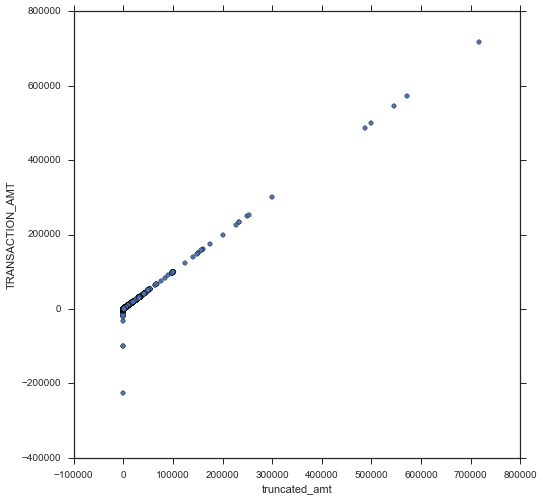

In [170]:
top_states = df.STATE.value_counts().index
df.query('STATE in @top_states').assign(truncated_amt=truncated_amt).plot(kind='scatter', x='truncated_amt',
                                                                          y='TRANSACTION_AMT', figsize=(8, 8))

In [105]:
def top_ten_share(employers):
    counts = employers.value_counts()
    return counts.nlargest(10).sum() / counts.sum()

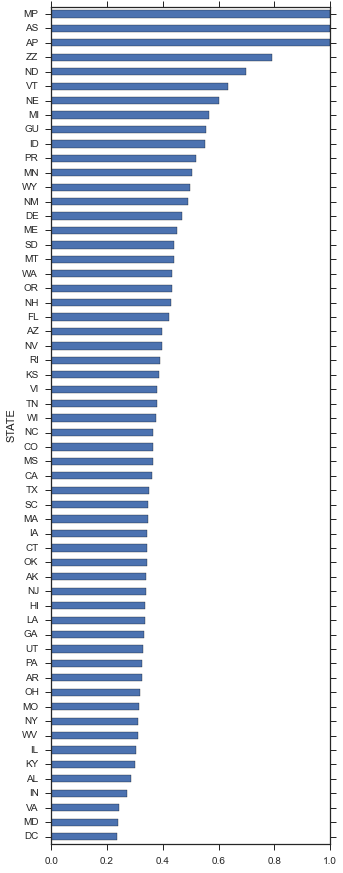

In [65]:
df.groupby('STATE').EMPLOYER.agg(top_ten_share).order().plot(kind='barh', figsize=(5, 15))

In [71]:
top10.loc['IA']

RETIRED                            143
SELF                               120
NONE                               110
JOHN DEERE SHARED SERVICES INC.     64
NOT EMPLOYED                        51
SELF EMPLOYED                       45
SELF-EMPLOYED                       45
HY-VEE INC                          27
UNIVERSITY OF IOWA                  24
UNIV OF IOWA                        16
dtype: int64

# Joining tables

Easy to do sql-style joins

In [116]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [10]:
cm.head()

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000059,HALLMARK CARDS PAC,DEAN RODENBOUGH,2501 MCGEE,MD#288,KANSAS CITY,MO,64108,U,Q,UNK,M,C,NaN,NaN
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612,U,Q,UNK,Q,T,NaN,NaN
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,"VIDYA KORA, M.D.","322 CANAL WALK, CANAL LEVEL",NaN,INDIANAPOLIS,IN,46202,U,Q,NaN,Q,M,NaN,NaN


Problem: Commitee names are not in the table we're interested in.

Solution: join `df` to `cm`.

Tools: slicing and `pd.merge`

In [12]:
cm[['CMTE_ID', 'CMTE_NM']]

,CMTE_ID,CMTE_NM
0,C00000059,HALLMARK CARDS PAC
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...
...,...,...
12070,C90015363,LONG ISLAND LAW ENFORCEMENT FOUNDATION
12071,C90015371,ENVIRONMENT FLORIDA
12072,C90015389,DOUG MAGEE FOR CONGRESS COMMITTEE
12073,C99002396,AMERICAN POLITICAL ACTION COMMITTEE


In [13]:
df = pd.merge(df, cm[['CMTE_ID', 'CMTE_NM']])

Default is like a `NATURAL JOIN`. Join on column names that overlap.
You can specify inner or outer with `how`, and which columns to join on with `on`.

In [16]:
with pd.option_context('display.max_rows', 20):
    print(df['CMTE_NM'].value_counts().head(20))

ACTBLUE                                                      18989
DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE                  17114
REPUBLICAN NATIONAL COMMITTEE                                 8877
DNC SERVICES CORPORATION/DEMOCRATIC NATIONAL COMMITTEE        7121
DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE                      6494
NRSC                                                          2919
EMILY'S LIST                                                  2885
NRCC                                                          2388
ERNST & YOUNG POLITICAL ACTION COMMITTEE                      2355
PRICEWATERHOUSECOOPERS POLITICAL ACTION COMMITTEE I           2209
CRUZ FOR PRESIDENT                                            1843
KAMALA HARRIS FOR SENATE                                      1469
OAKLAND COUNTY DEMOCRATIC PARTY                               1392
PORTMAN FOR SENATE COMMITTEE                                  1382
AMERICAN CRYSTAL SUGAR COMPANY POLITICAL ACTION COMMITTEE     

In [21]:
counts = df.CMTE_NM.value_counts()
counts.head()

ACTBLUE                                                   18989
DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE               17114
REPUBLICAN NATIONAL COMMITTEE                              8877
DNC SERVICES CORPORATION/DEMOCRATIC NATIONAL COMMITTEE     7121
DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE                   6494
dtype: int64

In [22]:
counts[counts.index.str.contains('president', case=False)]

CRUZ FOR PRESIDENT                                          1843
MARCO RUBIO FOR PRESIDENT                                    232
HARLEY BROWN FOR PRESIDENT CAMPAIGN COMMITTEE                 17
KERRY BOWERS FOR PRESIDENT COMMITTEE                           9
COMMITTEE TO ELECT KARIN L SWANSON FOR PRESIDENT               2
SHOS MUSIC COMMITTEE TO ELECT SHO MUHAMMAD FOR PRESIDENT       2
CHRISTOPHER HILL FOR PRESIDENT                                 1
MESPLAY FOR PRESIDENT                                          1
WILLIE CARTER FOR PRESIDENT COMMITTEE                          1
dtype: int64

In [23]:
df.TRANSACTION_AMT.describe()

count    205519.000000
mean       1024.927004
std        4580.138090
min     -226800.000000
25%         250.000000
50%         384.000000
75%        1000.000000
max      716585.000000
Name: TRANSACTION_AMT, dtype: float64

In [24]:
df = df[df.TRANSACTION_AMT > 200 ]

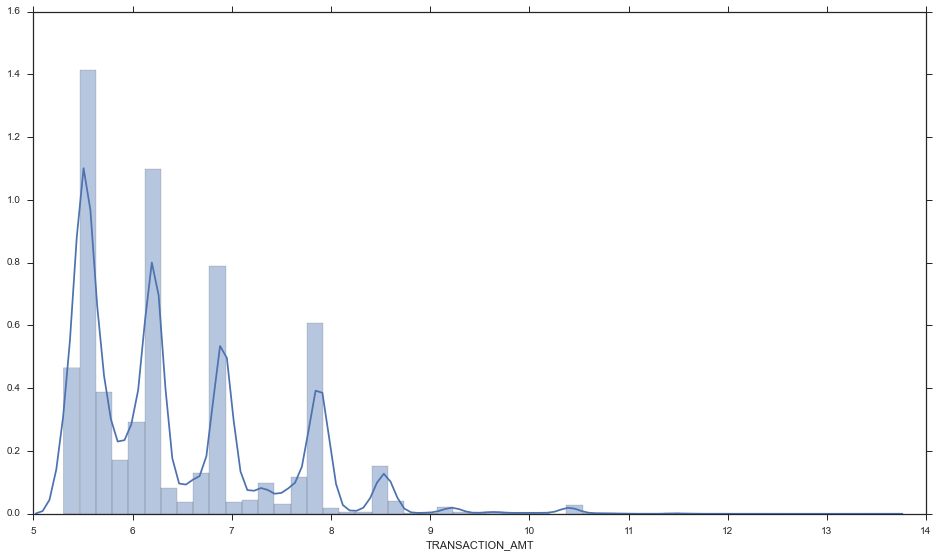

In [25]:
sns.distplot(np.log(df.TRANSACTION_AMT))
# ax.set_xticklabels([np.exp(float(x)) for x in ax.get_xticklabels()])

In [26]:
raised = df.groupby("CMTE_NM").TRANSACTION_AMT.agg(['mean', 'count', 'sum'])

In [28]:
raised.sort('mean', ascending=False)

,mean,count,sum
CMTE_NM,,,
CARLY FOR CALIFORNIA INC,487410.000,1,487410
RENFROE FOR CONGRESS,252584.000,1,252584
COOPERATIVE OF AMERICAN PHYSICIANS IE COMMITTEE,167540.625,8,1340325
ELISABETH JENSEN FOR CONGRESS,98142.000,1,98142
NEW REPUBLICAN.ORG,80000.000,4,320000
...,...,...,...
DEERE & COMPANY PAC (AKA JOHN DEERE PAC),208.000,96,19968
PHILADELPHIA FEDERAL CREDIT UNION PAC (PFCU-PAC),206.000,1,206
EATON CORPORATION PUBLIC POLICY ASSOCIATION,206.000,6,1236


In [29]:
raised.sort('count', ascending=False)

,mean,count,sum
CMTE_NM,,,
ACTBLUE,995.304199,9359,9315052
REPUBLICAN NATIONAL COMMITTEE,2158.789380,7891,17035007
DNC SERVICES CORPORATION/DEMOCRATIC NATIONAL COMMITTEE,1250.323990,6065,7583215
DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,1445.491882,4188,6053720
DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,1906.126665,3979,7584478
...,...,...,...
FRIENDS OF RENTERIA,1000.000000,1,1000
FRIENDS OF RICH NUGENT,250.000000,1,250
SECURE PAC,5000.000000,1,5000


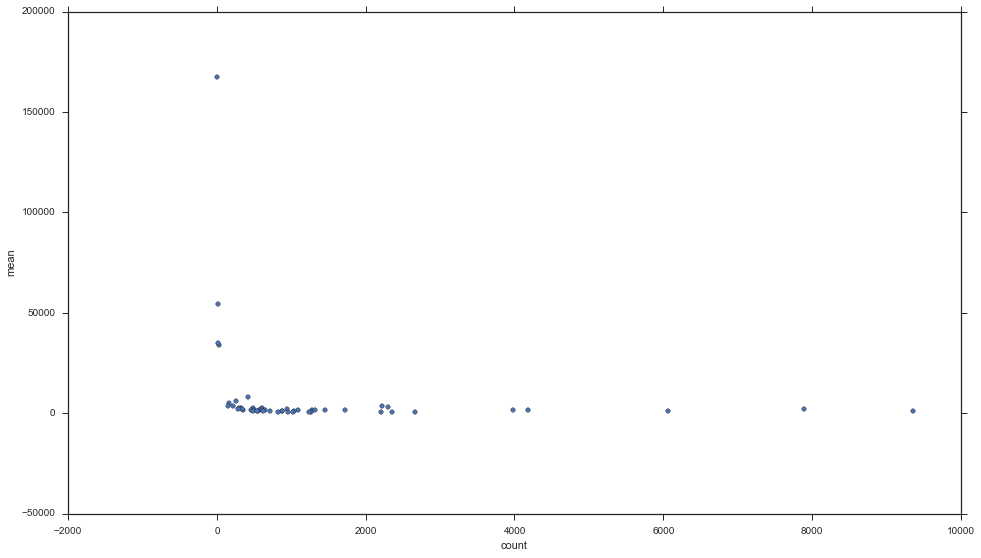

In [30]:
raised.sort('sum', ascending=False).head(50).plot(kind='scatter', x='count', y='mean')

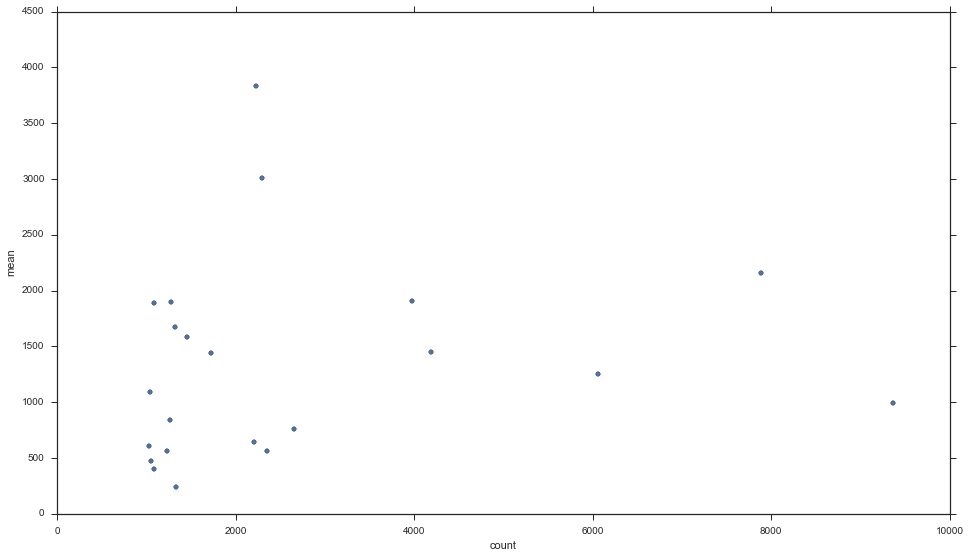

In [31]:
raised[raised['count'] > 1000].plot(kind='scatter', x='count', y='mean')

In [32]:
df.AMNDT_IND.value_counts()

N    155278
A     15517
T        99
dtype: int64

In [33]:
df.loc[df.TRANSACTION_AMT.idxmin()]

CMTE_ID                                                    C00010470
AMNDT_IND                                                          N
RPT_TP                                                            M2
TRANSACTION_PGI                                                    P
IMAGE_NUM                                                15950610535
                                         ...                        
FILE_NUM                                                      993044
MEMO_CD                                                          NaN
MEMO_TEXT                            P/R DEDUCTION ($201.50 MONTHLY)
SUB_ID                                           4021220151238903467
CMTE_NM            UNION PACIFIC CORP. FUND FOR EFFECTIVE GOVERNMENT
Name: 229, dtype: object

In [289]:
df.TRANSACTION_AMT.describe()

count    196266.000000
mean       1098.383638
std        4628.231211
min           1.000000
25%         250.000000
50%         416.000000
75%        1000.000000
max      716585.000000
Name: TRANSACTION_AMT, dtype: float64

In [362]:
cm[['CMTE_ID', "CMTE_NM"]].CMTE_ID.value_counts()

C00576769    2
C00213645    1
C90009846    1
C00574962    1
C00555227    1
            ..
C00503581    1
C00545004    1
C00283135    1
C00370643    1
C00473025    1
dtype: int64

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205519 entries, 0 to 205518
Data columns (total 21 columns):
CMTE_ID            205519 non-null object
AMNDT_IND          205519 non-null object
RPT_TP             205519 non-null object
TRANSACTION_PGI    205444 non-null object
IMAGE_NUM          205519 non-null int64
TRANSACTION_TP     205519 non-null object
ENTITY_TP          205365 non-null object
NAME               205510 non-null object
CITY               205373 non-null object
STATE              205151 non-null object
ZIP_CODE           204899 non-null object
EMPLOYER           165614 non-null object
OCCUPATION         171342 non-null object
TRANSACTION_DT     205518 non-null float64
TRANSACTION_AMT    205519 non-null int64
OTHER_ID           29908 non-null object
TRAN_ID            205507 non-null object
FILE_NUM           205519 non-null int64
MEMO_CD            5471 non-null object
MEMO_TEXT          48980 non-null object
SUB_ID             205519 non-null int64
dtypes: float6

In [ ]:
pd.merge(cn)

In [371]:
cn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 3960
Data columns (total 15 columns):
CAND_ID                 3961 non-null object
CAND_NAME               3960 non-null object
CAND_PTY_AFFILIATION    3956 non-null object
CAND_ELECTION_YR        3961 non-null int64
CAND_OFFICE_ST          3961 non-null object
CAND_OFFICE             3961 non-null object
CAND_OFFICE_DISTRICT    3949 non-null float64
CAND_ICI                3875 non-null object
CAND_STATUS             3956 non-null object
CAND_PCC                3696 non-null object
CAND_ST1                3868 non-null object
CAND_ST2                125 non-null object
CAND_CITY               3957 non-null object
CAND_ST                 3896 non-null object
CAND_ZIP                3866 non-null float64
dtypes: float64(2), int64(1), object(12)
memory usage: 495.1+ KB


In [415]:
cn.CAND_ST

0       AK
1       AL
2       AL
3       AL
4       AL
        ..
3956    VT
3957    WA
3958    WA
3959    WI
3960    WI
Name: CAND_ST, dtype: object

In [418]:
don = pd.merge(cc, cn[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION', 'CAND_OFFICE', 'CAND_ST']])
don = don[['TRANSACTION_PGI', 'ENTITY_TP', 'NAME', 'EMPLOYER', 'OCCUPATION',
           'TRANSACTION_DT', 'TRANSACTION_AMT', 'CAND_NAME', 'CAND_PTY_AFFILIATION',
           'CAND_OFFICE', 'CAND_ST']]
don.head()

,TRANSACTION_PGI,ENTITY_TP,NAME,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE,CAND_ST
0,P,COM,ADAM SCHIFF FOR CONGRESS,NaN,NaN,3062015,1000,"SCHIFF, ADAM",DEM,H,CA
1,P,ORG,SCHIFF FOR CONGRESS,NaN,NaN,3102015,1000,"SCHIFF, ADAM",DEM,H,CA
2,P,CCM,SCHIFF FOR CONGRESS,NaN,NaN,2202015,1000,"SCHIFF, ADAM",DEM,H,CA
3,P,CCM,SCHIFF FOR CONGRESS,NaN,NaN,2232015,1000,"SCHIFF, ADAM",DEM,H,CA
4,P,CCM,SCHIFF FOR CONGRESS,NaN,NaN,2252015,1000,"SCHIFF, ADAM",DEM,H,CA


In [385]:
don.CAND_PTY_AFFILIATION.unique()

array(['DEM', 'REP', 'DFL', 'UNK', 'IND', 'LIB'], dtype=object)

In [386]:
don.CAND_PTY_AFFILIATION.value_counts()

REP    15291
DEM     8213
UNK      111
DFL      101
IND       16
LIB        2
dtype: int64

In [387]:
don.NAME.value_counts()

FRIENDS OF PAT TOOMEY                              232
FRIENDS OF SCHUMER                                 221
TIM SCOTT FOR SENATE                               188
FRIENDS OF ROY BLUNT                               187
PORTMAN FOR SENATE COMMITTEE                       180
                                                  ... 
RELY ON YOUR BELIEFS POLITICAL ACTION COMMITTEE      1
HOEVEN FOR U.S. SENATE                               1
JOHN HARDY ISAKSON                                   1
RICHARD NEAL FOR HOUSE                               1
LOFGREN FOR CONGRESS/C00289603                       1
dtype: int64

In [510]:
x = don.groupby(['CAND_PTY_AFFILIATION', 'CAND_ST']).TRANSACTION_AMT.sum().unstack('CAND_PTY_AFFILIATION')[['DEM', 'REP']]
x = x.fillna(0)
x[x<=0] = 0

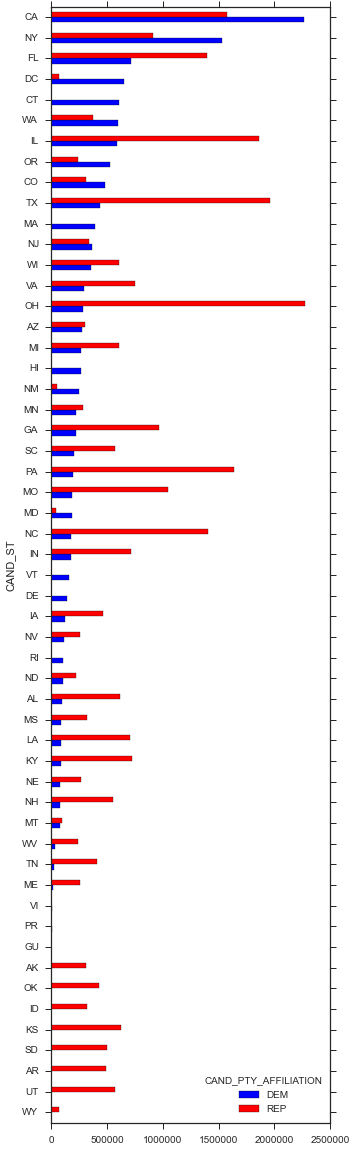

In [514]:
x.sort('DEM').plot(kind='barh', figsize=(5, 20), color=['blue', 'red'])

In [515]:
# random

In [525]:
query = """
select distinct * from image natural join parsed
where dt > TIMESTAMP "2015-05-05T21:00:00"
  and parser in ('roving', 'template')
order by dt desc;
"""

from ocr.server import make_engine

engine = make_engine.make_engine(kind='rds', db='taugspurger')
parsed = pd.read_sql_query(query, engine)

In [536]:
price = parsed.set_index(['parser', 'fuel_type', 'dt']).price.sort_index()
price = price.groupby(level=[0, 1, 2]).first()  # dedupe 6 values

In [537]:
price.index.is_unique

True

In [550]:
x = price.unstack('parser').dropna()
(x.roving != x.template).any()

False

In [394]:
with pd.option_context('display.max_rows', 20):
    print(don.groupby("NAME")
             .CAND_PTY_AFFILIATION
             .nunique()
             .order(ascending=False)
             .head(20))

NAME
SUSAN GAGE CATERERS                            3
CHAMBERS LOPEZ STRATEGIES                      2
DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE    2
WILLARD HOTEL                                  2
MENUS                                          2
RODNEY DAVIS FOR CONGRESS                      2
IAO PROPERTY HOLDINGS LLC                      2
UNITED PARCEL SERVICE INC.                     2
AMERICAN INSTITUTE OF CPAS                     2
WASHINGTON NATIONALS                           2
CLUB FOR GROWTH                                2
VAN SCOYOC ASSOCIATES, INC.                    2
VAN SCOYOC ASSOCIATES, INC. PAC                2
HONEYWELL INTERNATIONAL                        2
SCHNEIDER'S OF CAPITOL HILL                    2
AUERBACH, LEOR                                 2
DONOVAN FOR CONGRESS                           2
FINANCIAL INNOVATIONS                          2
CITIZENS FOR BOYLE                             2
RON JOHNSON FOR SENATE                         2
Name: CAND_PTY_

In [404]:
don.query('NAME == "DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE" & CAND_PTY_AFFILIATION != "DEM"')

,TRANSACTION_PGI,ENTITY_TP,NAME,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE
6624,P,PTY,DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE,NaN,NaN,3252015,483,"NOLAN, RICHARD M.",DFL,H


In [408]:
ratio = (don.groupby(['NAME', 'CAND_PTY_AFFILIATION']).TRANSACTION_AMT.sum()
            .groupby(level='NAME').transform(lambda x: x / x.sum()))
ratio.order()

NAME                                   CAND_PTY_AFFILIATION
JASON SMITH FOR CONGRESS               REP                     0.007055
SUSAN GAGE CATERERS                    UNK                     0.020505
HONEYWELL INTERNATIONAL                UNK                     0.023810
CLUB FOR GROWTH                        DEM                     0.028845
DONOVAN FOR CONGRESS                   DEM                     0.031024
                                                                 ...   
DEBBIE WASSERMAN SCHULTZ FOR CONGRESS  DEM                          NaN
ERNST VICTORY                          REP                          NaN
FRELINGHUYSEN, RODNEY P. REP.          REP                          NaN
FRIENDS OF JARED POLIS COMMITTEE       DEM                          NaN
RUDY HOBBS FOR CONGRESS                DEM                          NaN
Name: TRANSACTION_AMT, dtype: float64

In [412]:
ratio.order().xs('JASON SMITH FOR CONGRESS')

CAND_PTY_AFFILIATION
REP    0.007055
UNK    0.992945
Name: TRANSACTION_AMT, dtype: float64

In [380]:
don['CAND_PTY_AFFILIATION'] = don['CAND_PTY_AFFILIATION'].astype('category')
don['NAME']

In [ ]:
don.groupby('CAND_PTY_AFFILIATION')

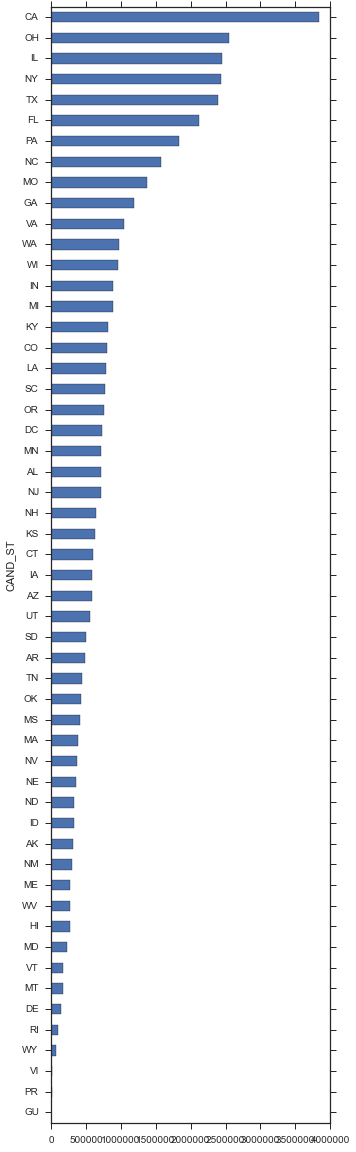

In [430]:
don.groupby("CAND_ST").TRANSACTION_AMT.sum().order().plot(kind='barh', figsize=(5, 20))

In [438]:
import statsmodels.api as sm

In [469]:
str(dta.YEAR.min())

'1700.0'

In [472]:
dta = sm.datasets.sunspots.load_pandas().data
dta['YEAR'] = dta.YEAR.astype(int)
dta.index = pd.date_range(start=str(dta.YEAR.min()), end=str(dta.YEAR.max()), freq='AS')
dta = dta.drop('YEAR', axis=1)

NonGuiException: 

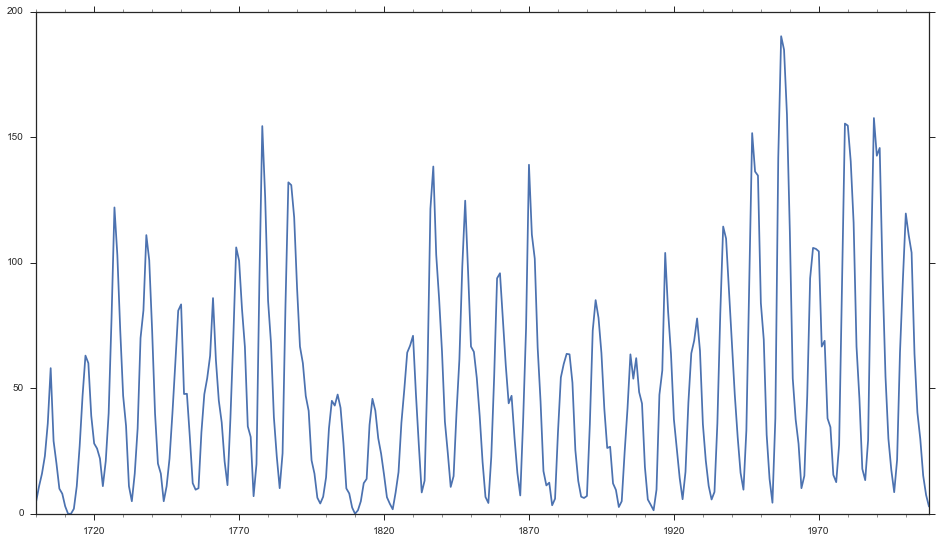

In [479]:
_ = dta.plot();

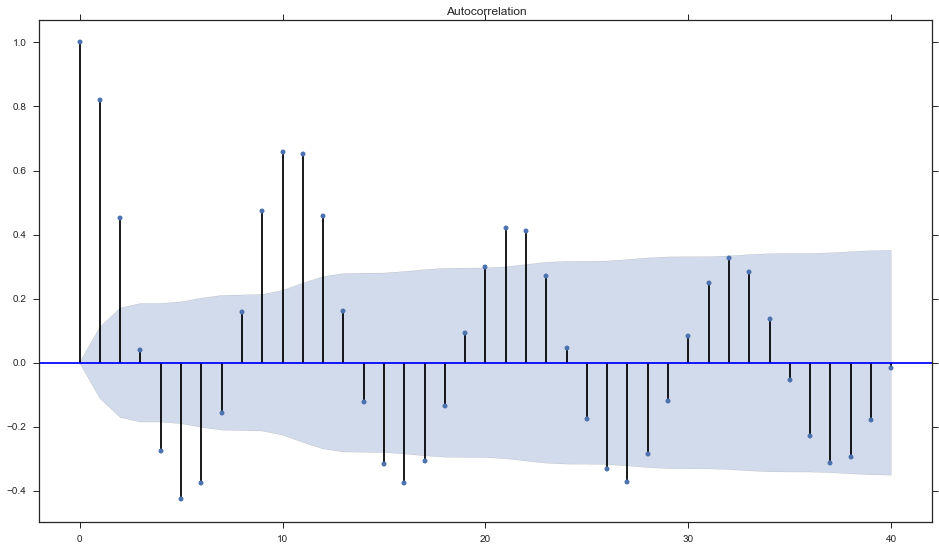

In [481]:
fig, ax = plt.subplots()
fig = sm.graphics.tsa.plot_acf(dta.SUNACTIVITY, lags=40, ax=ax)



In [482]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit()


In [181]:
df.TRANSACTION_DT.astype(str).order()

41620     10012014.0
41622     10012014.0
41621     10012014.0
41623     10012014.0
41618     10012014.0
             ...    
203011     8152014.0
203010     8152014.0
90369      9032014.0
22662      9162014.0
145121           nan
Name: TRANSACTION_DT, dtype: object

In [186]:
s = df.TRANSACTION_DT.astype(str).str.rstrip('.0')
s[s.str.len() == 7] = s[s.str.len() == 7].str.pad(8, fillchar='0')
df['date'] = pd.to_datetime(s, format='%M%d%Y')

In [204]:
df['TRANSACTION_DT'] = df.TRANSACTION_DT.astype(str).str.rstrip('.0')

In [245]:
s = df.TRANSACTION_DT.copy()

In [246]:
s[s.str.len() == 7] =  s[(s.str.len() == 7)].str.pad(8, fillchar='0')

In [250]:
df['date'] = pd.to_datetime(s, format='%M%d%Y')

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205519 entries, 0 to 205518
Data columns (total 23 columns):
CMTE_ID            205519 non-null object
AMNDT_IND          205519 non-null object
RPT_TP             205519 non-null object
TRANSACTION_PGI    205444 non-null object
IMAGE_NUM          205519 non-null int64
TRANSACTION_TP     205519 non-null object
ENTITY_TP          205365 non-null object
NAME               205510 non-null object
CITY               205373 non-null object
STATE              205151 non-null object
ZIP_CODE           204899 non-null object
EMPLOYER           165614 non-null object
OCCUPATION         171342 non-null object
TRANSACTION_DT     205519 non-null object
TRANSACTION_AMT    205519 non-null int64
OTHER_ID           29908 non-null object
TRAN_ID            205507 non-null object
FILE_NUM           205519 non-null int64
MEMO_CD            5471 non-null object
MEMO_TEXT          48980 non-null object
SUB_ID             205519 non-null int64
CMTE_NM        

In [254]:
gr = df.groupby("date")
gr

In [261]:
# select avg(TRANSACTION_AMT) GROUP BY TRANSACTION_DT
amt = gr.TRANSACTION_AMT.mean().sort_index()

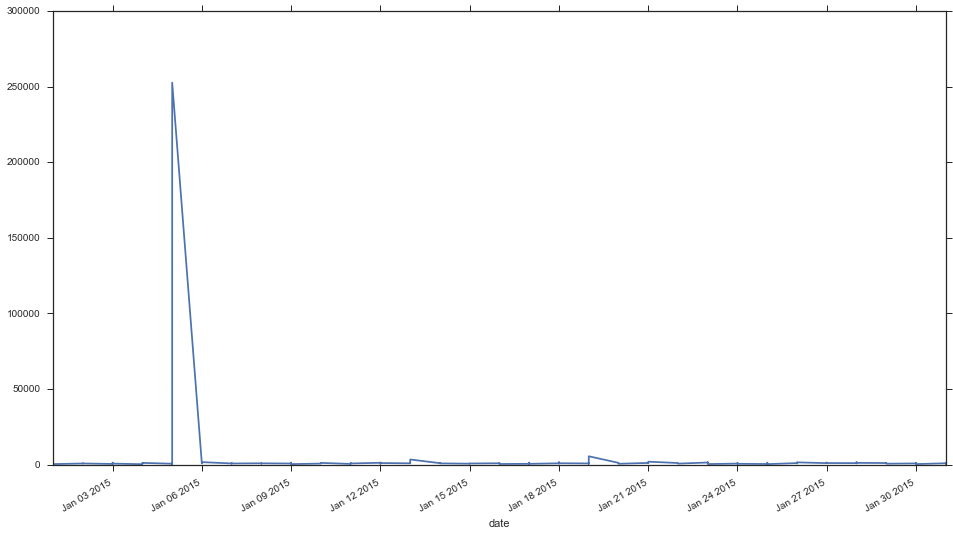

In [265]:
amt.loc['2015':].plot()

In [270]:
df.TRANSACTION_AMT.describe()

count    205519.000000
mean       1024.927004
std        4580.138090
min     -226800.000000
25%         250.000000
50%         384.000000
75%        1000.000000
max      716585.000000
Name: TRANSACTION_AMT, dtype: float64

In [277]:
with pd.option_context('display.max_rows', 50):
    print(df.loc[df.TRANSACTION_AMT.idxmin()])

CMTE_ID                                      C00075820
AMNDT_IND                                            N
RPT_TP                                              M5
TRANSACTION_PGI                                      P
IMAGE_NUM                                  15951424351
TRANSACTION_TP                                      15
ENTITY_TP                                          IND
NAME                            ADELSON, MIRIAM O. DR.
CITY                                         LAS VEGAS
STATE                                               NV
ZIP_CODE                                  8.910989e+08
EMPLOYER                           ADELSON DRUG CLINIC
OCCUPATION                                   PHYSICIAN
TRANSACTION_DT                                04092015
TRANSACTION_AMT                                -226800
OTHER_ID                                           NaN
TRAN_ID                                  SA11.15889243
FILE_NUM                                       1008869
MEMO_CD   

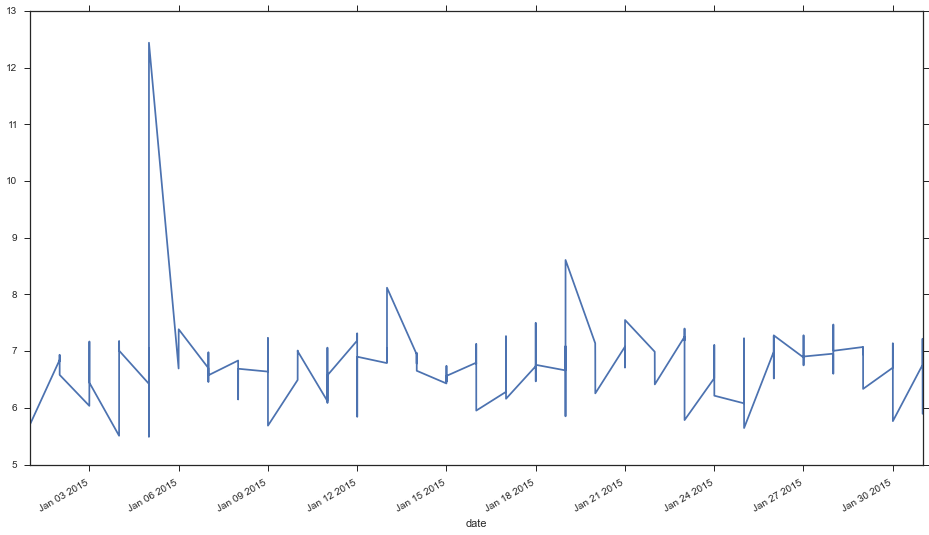

In [282]:
(df.query('TRANSACTION_AMT > 0')
   .groupby('date')
   .TRANSACTION_AMT
   .mean()
   .loc['2015':]
   .pipe(np.log)
   .plot())

Get commitee affiliation

In [150]:
cn[['CAND_ID', 'CAND_PTY']]

KeyError: "['CAND_PTY'] not in index"

In [ ]:
df = pd.

In [99]:
df.CMTE_NM = df.CMTE_NM.astype('category')

In [103]:
df["CMTE_NM"].value_counts()

ACTBLUE                                                      18989
DEMOCRATIC CONGRESSIONAL CAMPAIGN COMMITTEE                  17114
REPUBLICAN NATIONAL COMMITTEE                                 8877
DNC SERVICES CORPORATION/DEMOCRATIC NATIONAL COMMITTEE        7121
DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE                      6494
                                                             ...  
RIGHT TO LIFE/OREGON PAC                                         1
LIBERTARIAN NATIONAL CONGRESSIONAL COMMITTEE INC                 1
LAMAR STERNAD FOR CONGRESS                                       1
KIDNEY CARE PARTNERS POLITICAL ACTION COMMITTEE (KCP PAC)        1
18-29 PAC                                                        1
dtype: int64

In [90]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [88]:
df.CMTE_ID.value_counts()

C00401224    18989
C00000935    17114
C00003418     8877
C00010603     7121
C00042366     6494
             ...  
C00556266        1
C00573246        1
C00169532        1
C00541938        1
C00552463        1
dtype: int64

In [86]:
cn.CAND_NAME.value_counts().head()

KALEMKARIAN, TIMOTHY CHARLES         3
MARTIN, ANDY                         3
POLIQUIN, BRUCE L                    2
LOWE, THUY                           2
SINGLETON, JEROME FRANCIS MR. JR.    2
dtype: int64

In [72]:
df['TRANSACTION_DT'] = pd.to_datetime(df.TRANSACTION_DT.astype(str), format='%d%M%Y.0')

- CAN = Candidate
- CCM = Candidate Committee
- COM = Committee
- IND = Individual (a person)
- ORG = Organization (not a committee and not a person)
- PAC = Political Action Committee
- PTY = Party Organization

In [79]:
df.ENTITY_TP.value_counts()

IND    204442
ORG       566
CAN       291
PAC        27
CCM        20
COM        18
PTY         1
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205519 entries, 0 to 205518
Data columns (total 21 columns):
CMTE_ID            205519 non-null object
AMNDT_IND          205519 non-null object
RPT_TP             205519 non-null object
TRANSACTION_PGI    205444 non-null object
IMAGE_NUM          205519 non-null int64
TRANSACTION_TP     205519 non-null object
ENTITY_TP          205365 non-null object
NAME               205510 non-null object
CITY               205373 non-null object
STATE              205151 non-null object
ZIP_CODE           204899 non-null object
EMPLOYER           165614 non-null object
OCCUPATION         171342 non-null object
TRANSACTION_DT     205518 non-null datetime64[ns]
TRANSACTION_AMT    205519 non-null int64
OTHER_ID           29908 non-null object
TRAN_ID            205507 non-null object
FILE_NUM           205519 non-null int64
MEMO_CD            5471 non-null object
MEMO_TEXT          48980 non-null object
SUB_ID             205519 non-null int64
dtypes:

In [77]:
df.ENTITY_TP

0         IND
1         IND
2         IND
3         IND
4         IND
         ... 
205514    IND
205515    IND
205516    IND
205517    IND
205518    IND
Name: ENTITY_TP, dtype: object

In [37]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [43]:
df.TRANSACTION_DT

ValueError: Cannot convert NA to integer

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205519 entries, 0 to 205518
Data columns (total 21 columns):
CMTE_ID            205519 non-null object
AMNDT_IND          205519 non-null object
RPT_TP             205519 non-null object
TRANSACTION_PGI    205444 non-null object
IMAGE_NUM          205519 non-null int64
TRANSACTION_TP     205519 non-null object
ENTITY_TP          205365 non-null object
NAME               205510 non-null object
CITY               205373 non-null object
STATE              205151 non-null object
ZIP_CODE           204899 non-null object
EMPLOYER           165614 non-null object
OCCUPATION         171342 non-null object
TRANSACTION_DT     205518 non-null float64
TRANSACTION_AMT    205519 non-null int64
OTHER_ID           29908 non-null object
TRAN_ID            205507 non-null object
FILE_NUM           205519 non-null int64
MEMO_CD            5471 non-null object
MEMO_TEXT          48980 non-null object
SUB_ID             205519 non-null int64
dtypes: float6

In [27]:
pd.read_csv('cm.txt', sep='|')

,C00000059,HALLMARK CARDS PAC,DEAN RODENBOUGH,2501 MCGEE,MD#288,KANSAS CITY,MO,64108,U,Q,UNK,M,C,Unnamed: 13,Unnamed: 14
0,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
1,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
2,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612,U,Q,UNK,Q,T,NaN,NaN
3,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,"VIDYA KORA, M.D.","322 CANAL WALK, CANAL LEVEL",NaN,INDIANAPOLIS,IN,46202,U,Q,NaN,Q,M,NaN,NaN
4,C00000729,AMERICAN DENTAL ASSOCIATION POLITICAL ACTION C...,"HARRISON, THOMAS C. DR","1111 14TH STREET, NW",SUITE 1100,WASHINGTON,DC,20005,B,Q,UNK,M,M,AMERICAN DENTAL ASSOCIATION,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12069,C90015363,LONG ISLAND LAW ENFORCEMENT FOUNDATION,NaN,868 CHURCH STREET - SUITE 1,NaN,BOHEMIA,NY,NaN,U,I,NaN,Q,NaN,NaN,NaN
12070,C90015371,ENVIRONMENT FLORIDA,NaN,3110 1ST AVE. N. SUITE 2K,NaN,ST. PETERSBURG,FL,33713,U,I,NaN,Q,NaN,NaN,NaN
12071,C90015389,DOUG MAGEE FOR CONGRESS COMMITTEE,NaN,3040 FAIRWAY DRIVE,NaN,BRANDON,MS,39047,U,I,NaN,Q,NaN,NaN,NaN
12072,C99002396,AMERICAN POLITICAL ACTION COMMITTEE,"VERSNEL, J.H.",PO BOX 1682,NaN,BELLEVUE,WA,98009,U,Q,NaN,Q,M,NONE,NaN


In [24]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00004606,N,M4,P,15951124869,15,IND,"ARNOLD, ROBERT",MCPHERSON,KS,...,SELF,OPTOMETRIST,3102015,1000,NaN,SA11AI.20747,1002259,NaN,NaN,4041320151241796098
1,C00004606,N,M4,P,15951124869,15,IND,"BICKLE, DON",HAYS,KS,...,RETIRED,RETIRED,3302015,1000,NaN,SA11AI.20772,1002259,NaN,NaN,4041320151241796099
2,C00004606,N,M4,P,15951124869,15,IND,"ROSSMAN, RICHARD",OLATHE,KS,...,CRAWFORD SALES COMPANY,BUSINESSMAN,3302015,250,NaN,SA11AI.20759,1002259,NaN,NaN,4041320151241796100
3,C00452383,N,M4,P,15951124897,15,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,...,NaN,NaN,3112015,500,NaN,SA11AI.25088,1002261,NaN,NaN,4041320151241796102
4,C00452383,N,M4,P,15951124897,15,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,...,NaN,NaN,3022015,250,NaN,SA11AI.25074,1002261,NaN,NaN,4041320151241796103


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205519 entries, 0 to 205518
Data columns (total 21 columns):
CMTE_ID            205519 non-null object
AMNDT_IND          205519 non-null object
RPT_TP             205519 non-null object
TRANSACTION_PGI    205444 non-null object
IMAGE_NUM          205519 non-null int64
TRANSACTION_TP     205519 non-null object
ENTITY_TP          205365 non-null object
NAME               205510 non-null object
CITY               205373 non-null object
STATE              205151 non-null object
ZIP_CODE           204899 non-null object
EMPLOYER           165614 non-null object
OCCUPATION         171342 non-null object
TRANSACTION_DT     205518 non-null float64
TRANSACTION_AMT    205519 non-null int64
OTHER_ID           29908 non-null object
TRAN_ID            205507 non-null object
FILE_NUM           205519 non-null int64
MEMO_CD            5471 non-null object
MEMO_TEXT          48980 non-null object
SUB_ID             205519 non-null int64
dtypes: float6

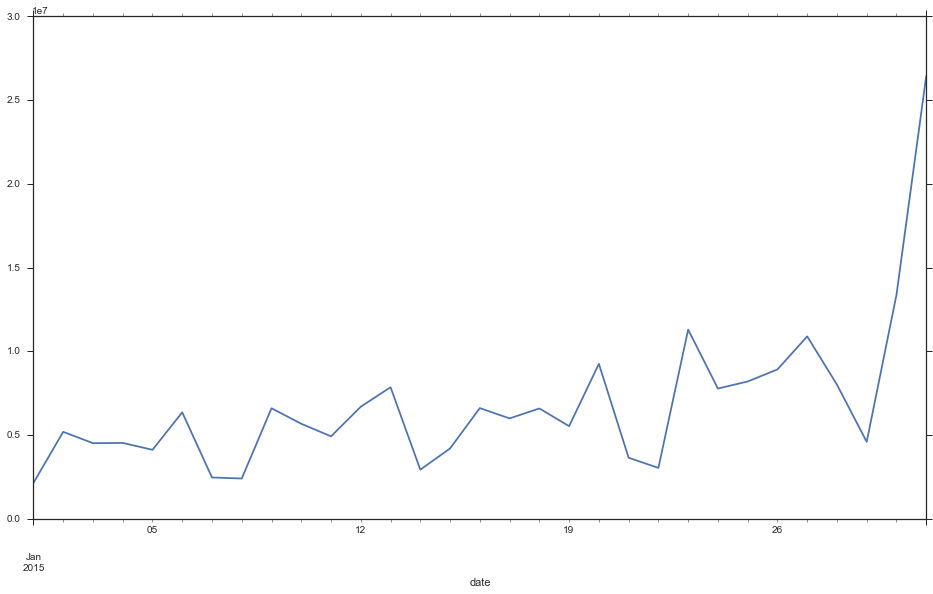

In [211]:
df.groupby('date').TRANSACTION_AMT.sum().loc['2015':].resample('D', how='sum').plot()

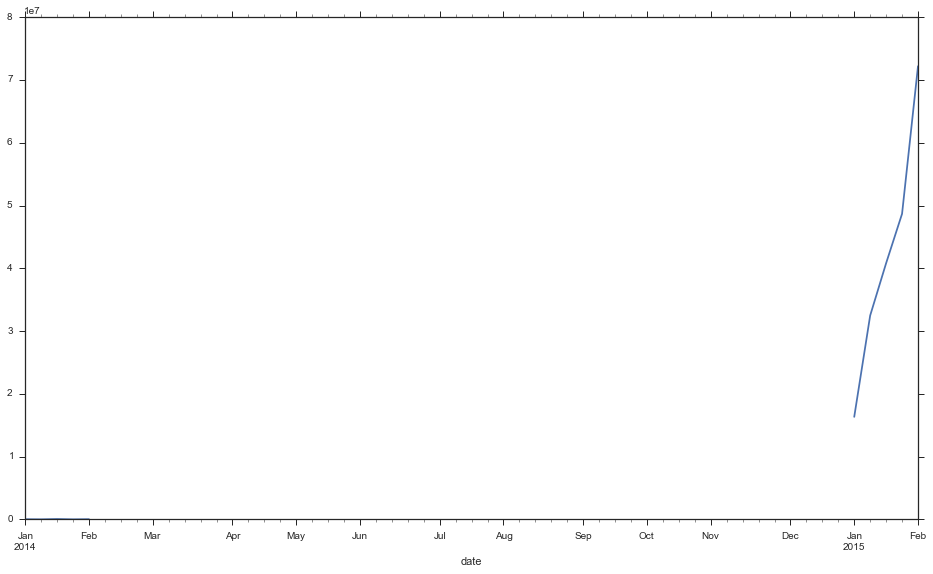

In [199]:
ts = df.groupby('date').TRANSACTION_AMT.sum().resample('W', how='sum')
ts.loc['2014':].plot()